In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model


In [ ]:
batch_sizes = {
    'Full Batch': len(X_train),
    'SGD': 1,
    'Mini-Batch': 32
}

epochs = 10
history_dict = {}


In [ ]:
for name, batch_size in batch_sizes.items():
    print(f"\nTraining with {name} (batch size: {batch_size})")
    model = create_model()
    history = model.fit(X_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       validation_data=(X_test, y_test),
                       verbose=1)
    history_dict[name] = history.history



Training with Full Batch (batch size: 60000)


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0926 - loss: 2.3701 - val_accuracy: 0.2016 - val_loss: 2.1997
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.1988 - loss: 2.1991 - val_accuracy: 0.3291 - val_loss: 2.0494
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.3240 - loss: 2.0520 - val_accuracy: 0.4624 - val_loss: 1.9154
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.4543 - loss: 1.9210 - val_accuracy: 0.5742 - val_loss: 1.7915
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5565 - loss: 1.8001 - val_accuracy: 0.6333 - val_loss: 1.6745
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.6171 - loss: 1.6858 - val_accuracy: 0.6778 - val_loss: 1.5633
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6583 - loss: 1.5769 - val_accuracy: 0.7059 - val_loss: 1.4580
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.6926 - loss: 1.4736 - val_accuracy: 0.7324 - val_loss: 1.

In [ ]:
def plot_history(histories, metric='accuracy'):
    plt.figure(figsize=(12, 6))
    
    for name, history in histories.items():
        val = plt.plot(history[f'val_{metric}'], '--', 
                      label=f'{name} Val {metric}')
        plt.plot(history[metric], color=val[0].get_color(),
                label=f'{name} Train {metric}')
    
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


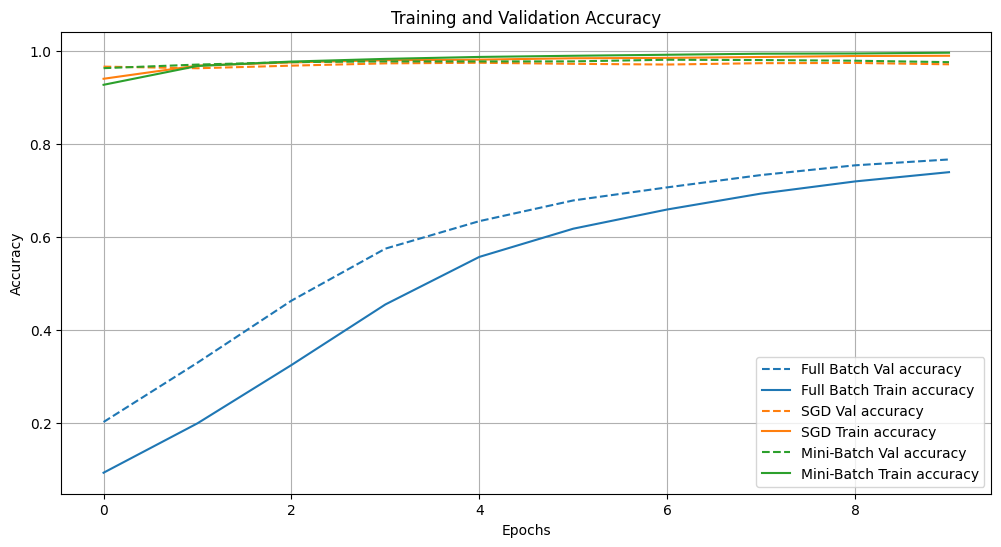

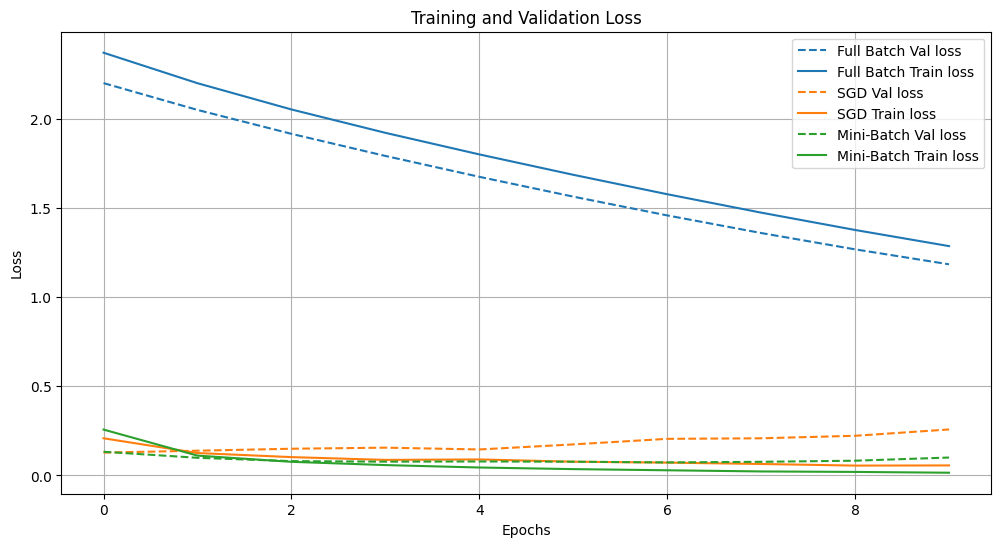

In [ ]:
plot_history(history_dict, 'accuracy')
plot_history(history_dict, 'loss')


In [ ]:
print("\nFinal Validation Accuracies:")
for name in batch_sizes.keys():
    acc = history_dict[name]['val_accuracy'][-1]
    print(f"{name}: {acc:.4f}")



Final Validation Accuracies:
Full Batch: 0.7659
SGD: 0.9704
Mini-Batch: 0.9750
